# Python e API (Application Programming Interface)

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [9]:
import requests # requisitar dados
import json # tratar dados JSON
from requests import get

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/all")
cotacoes_dic = cotacoes.json() # transformando em um dicionário python
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.5851', 'low': '5.5844', 'varBid': '0.0007', 'pctChange': '0.01', 'bid': '5.5846', 'ask': '5.5856', 'timestamp': '1634677201', 'create_date': '2021-10-19 18:00:01'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.47', 'low': '5.45', 'varBid': '-0.015', 'pctChange': '-0.27', 'bid': '5.29', 'ask': '5.62', 'timestamp': '1622030940', 'create_date': '2021-05-26 09:09:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.518', 'low': '4.5156', 'varBid': '-0.001', 'pctChange': '-0.02', 'bid': '4.5146', 'ask': '4.5169', 'timestamp': '1634677540', 'create_date': '2021-10-19 18:05:40'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.7077', 'low': '7.7041', 'varBid': '0.0029', 'pctChange': '0.04', 'bid': '7.7028', 'ask': '7.707', 'timestamp': '1634677540', 

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [13]:
print("Dólar: {}".format(cotacoes_dic['USD']['bid']))
print("Euro: {}".format(cotacoes_dic['EUR']['bid']))
print("Bitcoin: {}".format(cotacoes_dic['BTC']['bid']))

Dólar: 5.5846
Euro: 6.496
Bitcoin: 355


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [22]:
cotacoes_dolar30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar30d_dic = cotacoes_dolar30d.json()

# Fazendo com For
lista_cotacoes_dolar_for = []
for item in cotacoes_dolar30d_dic:
    lista_cotacoes_dolar_for.append(item['bid'])

# Fazendo com List Comprehension
lista_cotacoes_dolar_listcomprehension = [item ['bid'] for item in cotacoes_dolar30d_dic] # list comprehension

print(lista_cotacoes_dolar_for)
print(lista_cotacoes_dolar_listcomprehension)

#podemos transformá-los em float:
lista_cotacoes_dolar_listcomprehension = [float(item ['bid']) for item in cotacoes_dolar30d_dic] # list comprehension
print(lista_cotacoes_dolar_listcomprehension)

['5.2332', '5.0358', '5.5458', '5.6753', '5.5679', '5.6133', '5.5892', '5.6639', '5.7075', '5.7071', '5.6315', '5.7729', '5.7819', '5.7561', '5.6491', '5.6211', '5.5214', '5.5602', '5.5832', '5.6244', '5.6156', '5.5518', '5.5357', '5.672', '5.8025', '5.8755', '5.6908', '5.6693', '5.6193', '5.6761']
['5.2332', '5.0358', '5.5458', '5.6753', '5.5679', '5.6133', '5.5892', '5.6639', '5.7075', '5.7071', '5.6315', '5.7729', '5.7819', '5.7561', '5.6491', '5.6211', '5.5214', '5.5602', '5.5832', '5.6244', '5.6156', '5.5518', '5.5357', '5.672', '5.8025', '5.8755', '5.6908', '5.6693', '5.6193', '5.6761']
[5.2332, 5.0358, 5.5458, 5.6753, 5.5679, 5.6133, 5.5892, 5.6639, 5.7075, 5.7071, 5.6315, 5.7729, 5.7819, 5.7561, 5.6491, 5.6211, 5.5214, 5.5602, 5.5832, 5.6244, 5.6156, 5.5518, 5.5357, 5.672, 5.8025, 5.8755, 5.6908, 5.6693, 5.6193, 5.6761]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [37]:
cotacoes_bitcoin = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20200101&end_date=20201031')
cotacoes_bitcoin_dic = cotacoes_bitcoin.json()

# Fazendo com List Comprehension
lista_cotacoes_btc = [float(item ['bid']) for item in cotacoes_bitcoin_dic] # list comprehension
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)

[35750.0, 35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48800.4, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 

#### Gráfico com as cotações do BitCoin

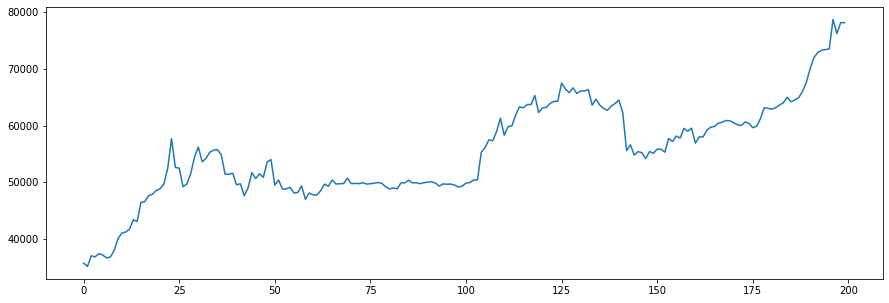

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)
plt.show()

# Python e API com Login

### O 1º Passo de toda API com Login é criar uma conta e pegar suas credenciais

### No seu código, o 1º passo é sempre estabelecer a conexão com a API, usando seu login e suas credenciais

- Como cada API é uma ferramenta diferente, cada uma delas pode exigir que você faça algum tipo de configuração, que vai estar explicada na API. No nosso caso, teremos que validar um número e criar um número de envio

- Depois, usamos os métodos da API normalmente para fazer o que queremos. No nosso caso, enviar um SMS

#### 1. Vamos criar um login no Twilio

https://www.twilio.com/docs/libraries/python

#### 2. Depois do Login, vamos pegar 3 informações:

- ID da Conta
- Token
- Número de Envio

#### 3. Agora vamos validar um número porque no Twilio, enviar SMS para um número válido é de graça

#### 4. Agora podemos fazer o nosso código de acordo com as orientações do Twilio

In [5]:
from twilio.rest import Client

account_sid = "ACbb3b96538ea72cb7cd49a2cc713bf17c"
token = "3bfc652a7f5c4470c806e4213e33d531"
remetente = "+13192846346"
destino = "+5512981705707"

client = Client(account_sid, token)

message = client.messages.create(to= destino, from_= remetente, body="Salve, irmão")

print(message.sid) 

ImportError: cannot import name 'Client' from 'twilio.rest' (unknown location)

# Gravação Mentoria API do Google Sheets com Python
Caso queira continuar no tema de Python e APIs, fizemos há um tempo uma mentoria de cerca de 2hrs focada exclusivamente na API do Google Sheets, que é uma API bem chatinha de se integrar porque exige vários passos.

Essa aula está no Módulo "Gravação dos Encontros ao Vivo", mas vou deixar o link aqui caso queira acessar agora.

Link da Gravação: 8. https://hashtag.eadplataforma.com/lesson/detail/15/3937/

Depois de assistir a aula, você pode voltar aqui e continuar o ritmo normal do curso.

# Gravação Mentoria de REST API com Python
Caso queira se aprofundar em APIs, fizemos há um tempo uma mentoria de cerca de 2hrs focada exclusivamente na criação de APIs em Python usando o Flask e explicando o que é uma REST API

Essa aula está no Módulo "Gravação dos Encontros ao Vivo", mas vou deixar o link aqui caso queira acessar agora.

Link da Gravação: 11. https://hashtag.eadplataforma.com/lesson/detail/15/4057/ 

Depois de assistir a aula, você pode voltar aqui e continuar o ritmo normal do curso.